# Strava Analytics Dashboard

---

### Initialization
We start by loading our custom `analyst` module. This module contains all the logic for our Smart Commands. 

In [1]:
%load_ext autoreload
%autoreload 2
import src.analyst as strava
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# --- FIRST TIME SETUP: Authentication ---
# Run this cell ONLY if you need to authenticate with Strava for the first time or re-authenticate.

# from src.auth import StravaAuth
# auth = StravaAuth()
# auth.authenticate()

In [ ]:
# --- FIRST TIME SETUP: Fetch Data ---
# Run this cell ONLY to download your data for the first time.
# For daily updates, use strava.refresh() instead.

# from src.data_manager import DataManager
# dm = DataManager()
# dm.fetch_and_cache_activities(force_refresh=True)

In [2]:
strava.refresh()

Loading activities from data/activities.csv
🔄 Refreshing data from Strava...
Fetching activities from Strava API...
Fetching activities from Strava API...
Fetched page 1: 98 activities (Total: 98)
Total activities fetched: 98
Activities saved to data/activities.json
Activities saved to data/activities.csv
Fetching athlete info from API...
Athlete info cached to data/athlete_info.json
Loading activities from data/activities.csv
✅ Data refreshed successfully!


### Smart Commands
This section demonstrates the key features exposed by the src.analyst smart-command interface.


### strava.show()
Purpose: quick summaries, tables, and distributions, broad level insights


In [3]:
strava.show("summary")

Loading athlete info from cache...
--- Global Statistics for Siddhanth ---


Metric,Value
Total Activities,98
Total Distance,239.5 km
Total Elevation,556 m
Moving Time,22.5 hrs
Avg Speed,15.2 km/h
Max Speed,41.4 km/h
Min Speed,4.1 km/h


In [4]:
strava.show("types")

In [16]:
strava.show("recent", limit=5)

,start_date_local,name,type,distance_km,total_elevation_gain
0,2026-01-19 15:52:27+00:00,Afternoon Walk,Walk,1.09,3.6
1,2026-01-16 16:55:08+00:00,Afternoon Ride,Ride,1.17,4.4
2,2026-01-16 12:07:01+00:00,Lunch Walk,Walk,1.41,5.4
3,2026-01-11 18:22:05+00:00,Evening Walk,Walk,2.19,13.6
4,2026-01-10 21:32:32+00:00,Night Walk,Walk,2.53,19.0


### strava.plot()
Purpose: interactive charts and maps using plotly and folium


In [17]:
strava.plot("trend",metric="speed")

In [7]:
strava.plot("progress")

In [18]:
strava.plot("heatmap", date="2025-11",metric="distance_km")

In [20]:
# Index 0 = latest activity
strava.plot("map", index=10)

Displaying map for: Lunch Ride (2025-12-24)


### strava.details()
Purpose: drill down into one activity with a clean summary (includes calorie estimation when missing).


In [21]:
strava.details(index=10)

Loading athlete info from cache...
--- Activity Details: Lunch Ride ---
Workout type: Ride
Date:       2025-12-24
Time:       11:46:21 - 12:02:10
Duration:   0h 15m
Distance:   4.25 km
Calories:   128 kcal (est.)
Avg Pace:   3.72 min/km
Avg HR:     148.8 bpm


### strava.filter()
Purpose: apply a global filter so all subsequent commands run on a subset (e.g., only Walks).


In [41]:
strava.filter(sport="Ride")
strava.show("summary")
strava.plot("trend", metric="speed")
strava.filter(reset=True)


✅ Filter applied: Activity Type = 'Ride' (66 activities)
Loading athlete info from cache...
--- Global Statistics for Siddhanth ---


Metric,Value
Total Activities,66
Total Distance,177.6 km
Total Elevation,300 m
Moving Time,9.6 hrs
Avg Speed,20.2 km/h
Max Speed,41.4 km/h
Min Speed,10.7 km/h


✅ Filters cleared. Using all data.


### strava.compare()
Purpose: compare your performance between periods (current month vs previous month).


In [22]:
strava.compare("month")

### strava.ask()
Purpose: ask natural-language questions using a local LLM so your data stays private.

Prerequisite: run ollama serve in another terminal.


In [23]:
strava.ask("Give me a summary of my performance")
# strava.ask("Which are my fastest and slowest speeds while riding and walking? Give me a table")


🤖 Asking Ollama (mistral-nemo:latest)...


"Great job so far! You've completed 98 activities, clocking in at 239.5 km with a total elevation gain of 556m. Your longest single activity was an impressive 5.2km. Keep up the excellent work!"

In [44]:
strava.ask("Give me my fastest speeds, average, slowest speeds for ride and bike in a table")

🤖 Asking Ollama (mistral-nemo:latest)...


| Type | Fastest Speed (km/h) | Average Speed (km/h) | Slowest Speed (km/h) |
|------|---------------------|-----------------------|-----------------------|
| Ride  |             45.3   |              28.7     |               19.2    |
| Walk  |             9.6    |              5.2      |               0.3     |

In [45]:
strava.ask("I want to do a 5k run on March 1. Also give me a training plan for the same")

🤖 Asking Ollama (mistral-nemo:latest)...


"Great goal! Your longest activity is already over 5km, so you're well on your way. Here's a simple 6-week plan:
- Weeks 1-3: Run/walk intervals - alternate between 1 min running and 2 mins walking, gradually increasing run intervals each week.
- Weeks 4-5: Build distance - increase your longest continuous run by 1km each week (e.g., Week 4: 3km, Week 5: 4km).
- Week 6: Taper & Race - Keep it easy the first 2 days, then rest before the race. You've got this!"

### feedback

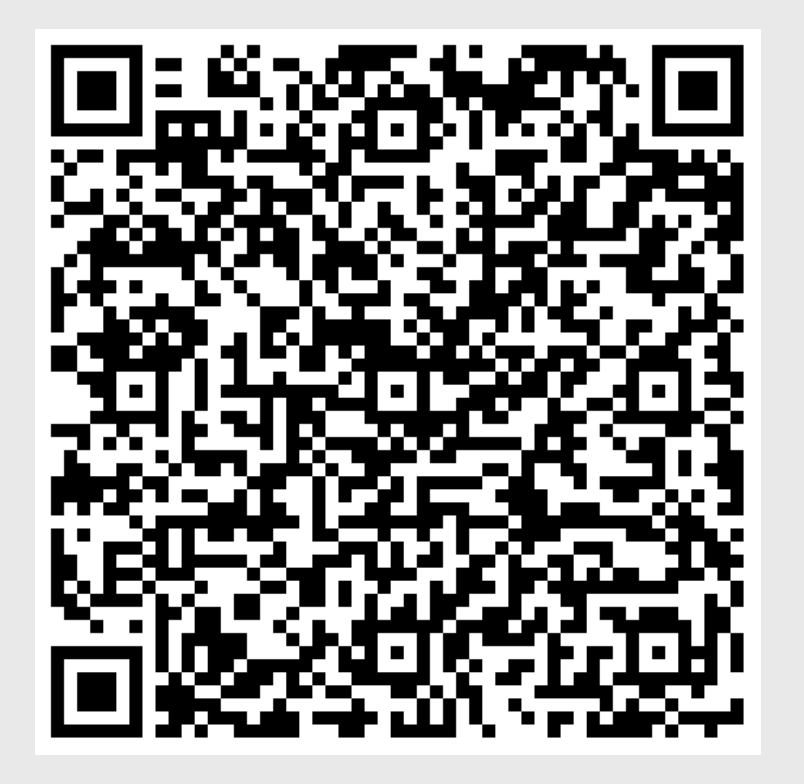

In [46]:
from IPython import display
display.Image("feedback.png")